Минасенко Борис 

5.1.12


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

Зададим наши векторы:

In [ ]:
x = np.array([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1, 1.25, 1.5,1.75,2])
y = np.array([0.192, -0.054, -0.209, -0.429, -0.413, -0.491, -0.357, -0.434, -0.140, -0.130, 0.142,0.288,0.876])
print("X: ", x)
print("Y: ", y)
m = 11
n = 13

X:  [-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75
  2.  ]
Y:  [ 0.192 -0.054 -0.209 -0.429 -0.413 -0.491 -0.357 -0.434 -0.14  -0.13
  0.142  0.288  0.876]


Метод наименьших квадрантов:

In [ ]:
def M(x, y, m):
    A = np.array([[x_**j for j in range(m+1)] for x_ in x])
    result = np.linalg.solve(A.T.dot(A), A.T.dot(y))
    return result
for i in range(len(x)):
    coef = np.poly1d(M(x, y, i))
    print(coef)
def point(x, coef):
    return np.sum(coef * (x**np.arange(coef.shape[0])))

 
-0.08915
 
-0.185 x + 0.1916
         2
-0.4411 x - 0.2183 x + 0.4099
         3          2
-0.4303 x - 0.2317 x + 0.3851 x + 0.01654
         4          3          2
-0.4252 x - 0.1133 x + 0.3361 x - 0.1223 x + 0.0694
         5          4          3          2
-0.4628 x - 0.1381 x + 0.5932 x - 0.1493 x - 0.1471 x + 0.0866
         6          5          4          3          2
-0.4525 x - 0.2121 x + 0.5128 x + 0.1009 x - 0.1254 x - 0.08954 x + 0.05871
        7          6          5          4          3           2
-0.441 x - 0.1336 x + 0.3378 x - 0.1732 x + 0.3169 x + 0.02104 x - 0.2288 x + 0.08214
        8          7          6          5          4          3
-0.457 x - 0.1068 x + 0.6167 x - 0.4315 x - 0.3319 x + 0.6617 x
            2
 + 0.04579 x - 0.3363 x + 0.1046
        9           8          7          6          5        4
-0.458 x - 0.07053 x + 0.6275 x - 0.7154 x - 0.2466 x + 1.19 x
           3         2
 - 0.2908 x - 0.563 x + 0.3468 x - 0.05382
         10         

Зависимость сигмы от m

Text(0, 0.5, 'sigma')

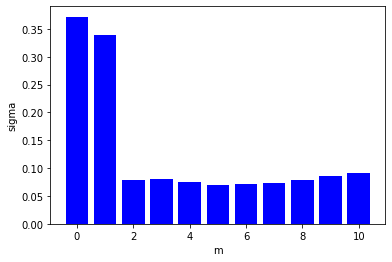

In [ ]:
sigmas = []
for m in range(11):
    coef = M(x, y, m)
    y_prev = np.array([point(x_, coef) for x_ in x])
    sigma = np.sqrt(np.sum((y_prev-y)**2) / (y.shape[0] - m))
    sigmas.append(sigma)
plt.bar(np.arange(11),sigmas,color='b')
plt.xlabel('m')
plt.ylabel('sigma')

Степень m*
многочлена наилучшего среднеквадратичного приближения:

In [ ]:
m__=np.argmin(sigmas)
print(m__)

5


Графики многочленов Pm, m=0,1,2,..., m*, и точечный график исходной функции:

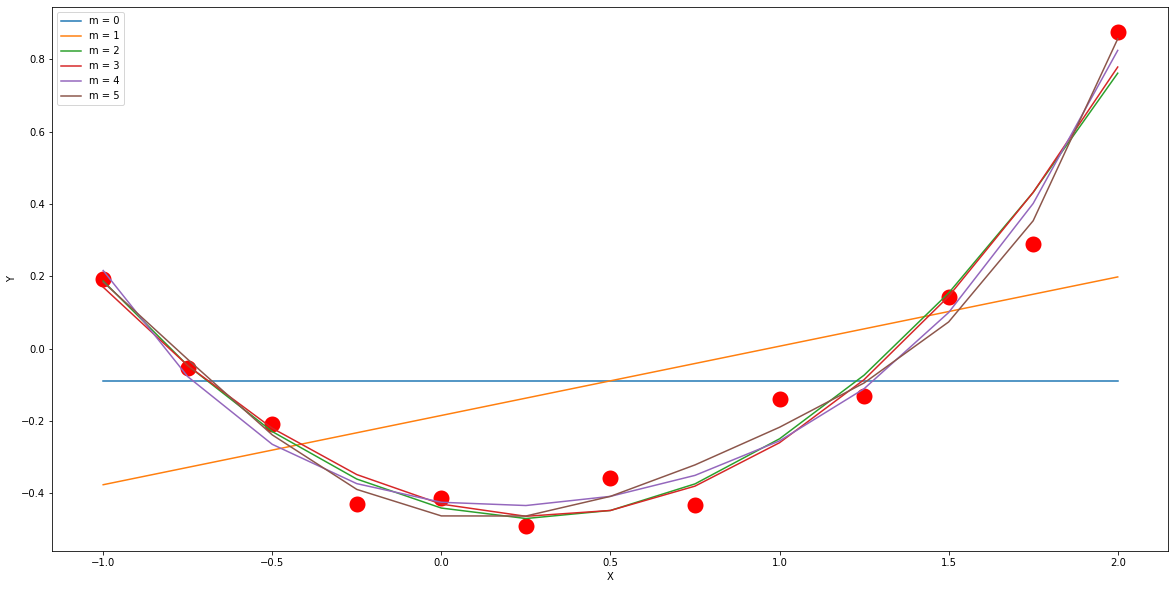

In [ ]:
plt.figure(figsize = (20, 10))
plt.scatter(x, y,color='r',linewidths=10)
for m in range(m__+1):
    coef = M(x,y,m)
    y_= np.array([point(x_,coef) for x_ in x])
    plt.plot(x, y_, label='m = '+str(m))
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

5.3.5

Зададим наши значения:

In [ ]:
x = np.array([-1.5, -1.2, -0.9, -0.6, -0.3, 0, 0.3, 0.6, 0.9, 1.2,1.5])
y = np.array([0.0829, 0.2192, 0.5794, 1.5315, 4.0481, 10.7, 4.0481, 1.5315, 0.5794, 0.2192, 0.0829])


Приведем к линейному виду и вычислим a и b:

In [ ]:
s = np.log(y)
t = np.abs(x)
coef = M(t,s,1)
a = np.round(coef[0], 5)
a=math.exp(a)
b = np.round(coef[1], 5)
print(a,"e^(",b,"|x|)")


10.701030015867007 e^( -3.2402 |x|)


5.7.6

Функция и интервал:

In [ ]:
def f(x):
    return np.abs(np.cos(x))
k = 30 
x = np.linspace(0,math.pi)

Вычислить значения функции yi = f (xi ) в произвольных точках xi , i=0,1,..., k-1, отрезка [a, b], по которым будет осуществляться интерполяция функции:

In [ ]:
y = np.array([f(x_) for x_ in x])

Составим программу-функцию, вычисляющую значение интерполяционного многочлена 1-ой степени по точкам (xi,yi)и (xi+1,yi+1)впроизвольнойточкеотрезка [xi,xi+1].Сеепомощьювычислить приближенные значения функции f(x) при кусочно-линейной интерполяции в 3k точках исходного отрезка [a,b]:

In [ ]:
def lin_inter(x, x0, x1):
    y0 = f(x0)
    y1 = f(x1)
    return(y0 - (y1 - y0) / (x1 - x0) * x0 +  (y1 - y0) / (x1 - x0) * x)

In [ ]:
n = 3*k + 1
x_slice = np.linspace(0, math.pi, n)
x_slice.shape

(91,)

Вычислим приближенные значения функции f(x) в 3k точках отрезка при глобальной интерполяции и построим график интерполирующих функций,
график исходной функции f(x), а также отметим точки (xi, yi), i=0,1,...,k-1, по которым осуществлялась
интерполяция:

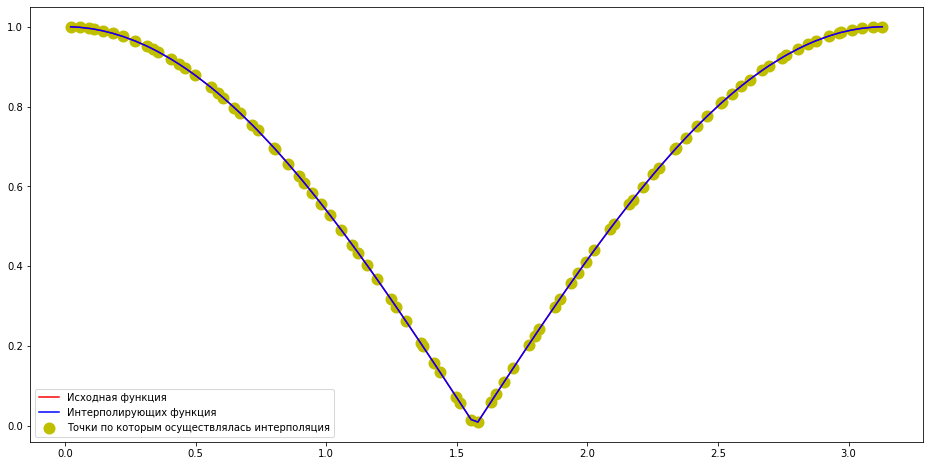

In [ ]:
import random
X_ = []
error1 = []
Y_ = []
for i in range(n-1):
    x_ = random.uniform(x_slice[i], x_slice[i+1])
    X_.append(x_)
    Y_.append(lin_inter(x_, x_slice[i], x_slice[i+1]))
    y_prediction = lin_inter(x_, x_slice[i], x_slice[i+1])
    error1.append (np.abs(y_prediction - f(x_)))
Y = np.array([f(x_) for x_ in X_])   
plt.figure(figsize = (16, 8))
plt.scatter(X_, Y_, color='y', label='Точки по которым осуществлялась интерполяция',linewidths=6)
plt.plot(X_,Y, label='Исходная функция', c='r')
plt.plot(X_,Y_, label = 'Интерполирующих функция', c='b')
plt.legend()

График погрешностей:

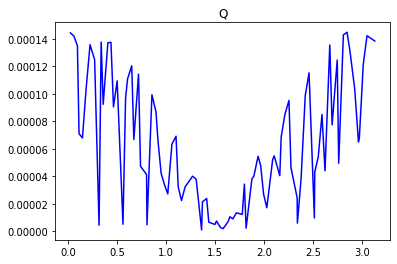

In [ ]:
plt.plot(X_,error1, c='b')
plt.title("Q");

5.8.6

Наша функция и интервал:

In [ ]:
def f(x):
    return np.exp(-(x**2))
a = -1
b = 1
k = 30 

  Вычислим значения в точках:

In [ ]:

X = np.linspace(a, b, 3 * k)
Y = f(X)
Xuni = np.linspace(a, b, k)
Yuni = f(Xuni)
Xcheb = np.array([np.cos((2 * i + 1) / (2. * k) * np.pi) for i in range(k)]) * (b - a) * 0.5 + (b + a) * 0.5
Ycheb = f(Xcheb)

Построим полином Лангранджа:


In [ ]:
def L_k(k, x, X):
    return np.prod([(x - Xj) / (X[k] - Xj) for Xj in X if X[k] - Xj != 0])

def lagr_poly(x, X, Y):
    return np.sum ([Y[k] * L_k(k, x, X) for k in range(Y.shape[0])])

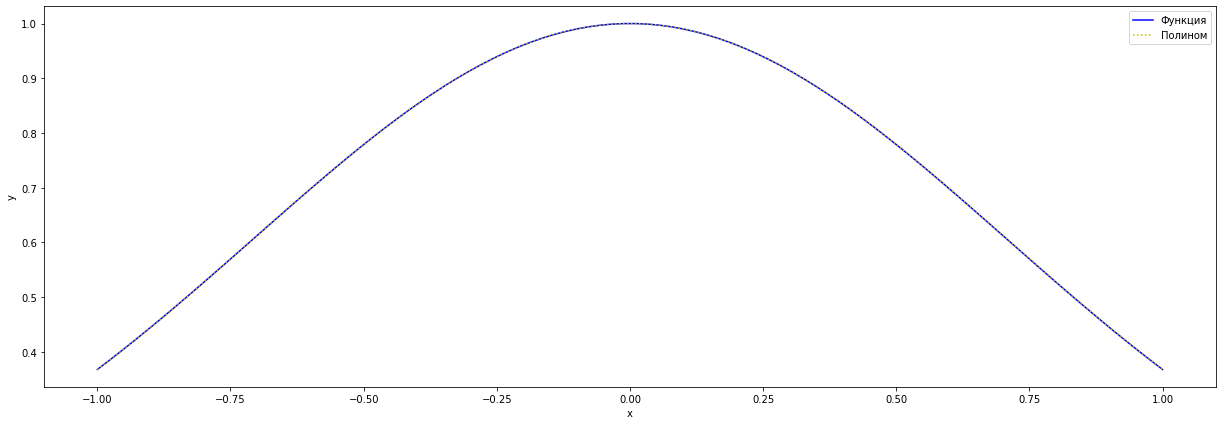

In [ ]:
plt.figure(figsize = (21, 7))

plt.plot(X, Y, label = u'Функция', color = 'b')
lagrY = [lagr_poly(x, Xuni, Yuni) for x in X]
plt.plot(X, lagrY, label = u'Полином', ls = ':', color = 'y')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [ ]:
print ('Ошибка полинома Лагранжа:', np.max(np.abs(Y - lagrY)))

Ошибка полинома Лагранжа: 2.2404272881360043e-10


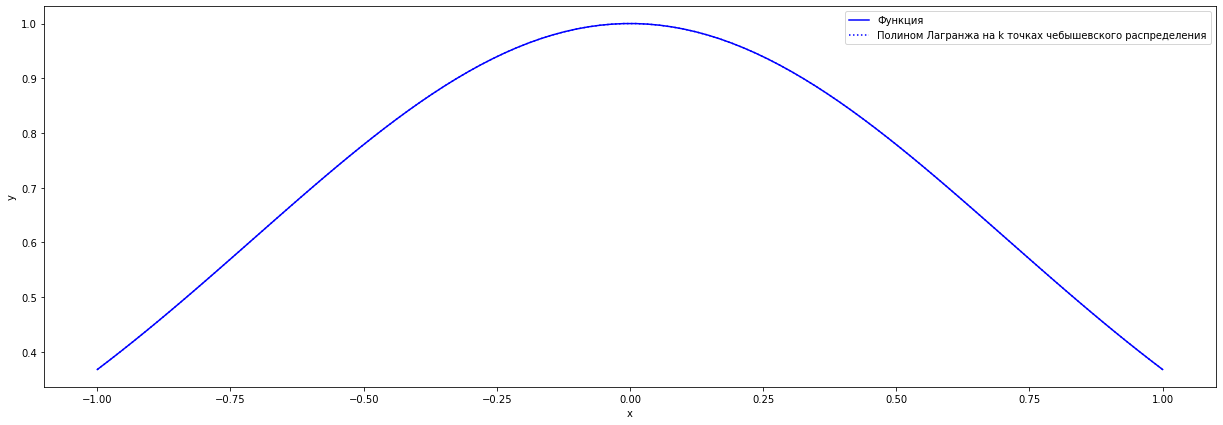

In [ ]:
plt.figure(figsize = (21, 7))
plt.plot(X, Y, label = u'Функция', color = 'b')
lagrY = [lagr_poly(x, Xcheb, Ycheb) for x in X]
plt.plot(X, lagrY, label = u'Полином Лагранжа на k точках чебышевского распределения', ls = ':', color = 'blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [ ]:
print ('Ошибка полинома Лагранжа на k точках чебышевского распределения:', np.max(np.abs(Y - lagrY)))

Ошибка полинома Лагранжа на k точках чебышевского распределения: 1.1102230246251565e-15


На 2к точках

In [ ]:

X = np.linspace(a, b, 2 * k)
Y = f(X)

Xuni = np.linspace(a, b, k)
Yuni = f(Xuni)
Xcheb = np.array([np.cos((2 * i + 1) / (2. * k) * np.pi) for i in range(k)]) * (b - a) * 0.5 + (b + a) * 0.5
Ycheb = f(Xcheb)

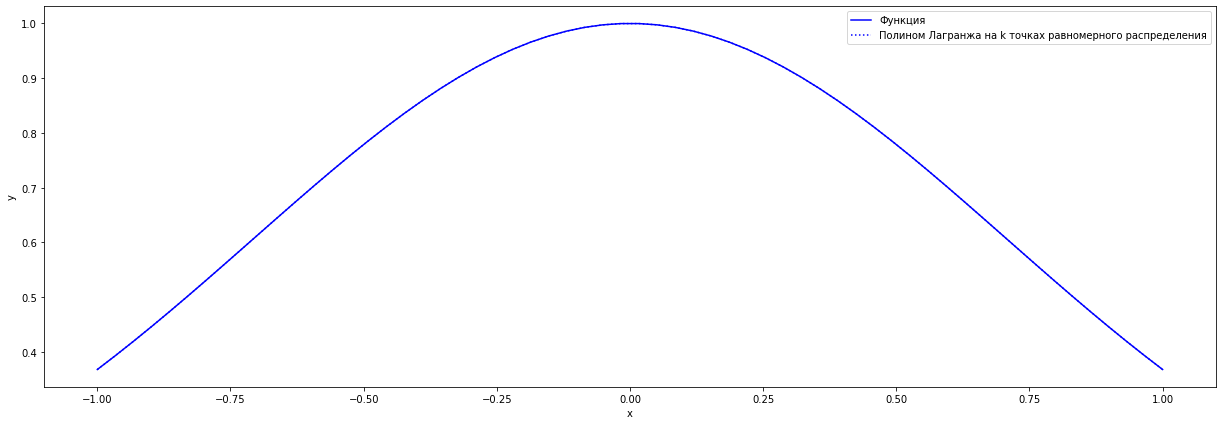

In [ ]:
plt.figure(figsize = (21, 7))
plt.plot(X, Y, label = u'Функция', color = 'b')
lagrY = [lagr_poly(x, Xuni, Yuni) for x in X]
plt.plot(X, lagrY, label = u'Полином Лагранжа на k точках равномерного распределения', ls = ':', color = 'blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [ ]:
print ('Ошибка полинома Лагранжа на k точках равномерного распределения:', np.max(np.abs(Y - lagrY)))

Ошибка полинома Лагранжа на k точках равномерного распределения: 9.466954997705557e-11


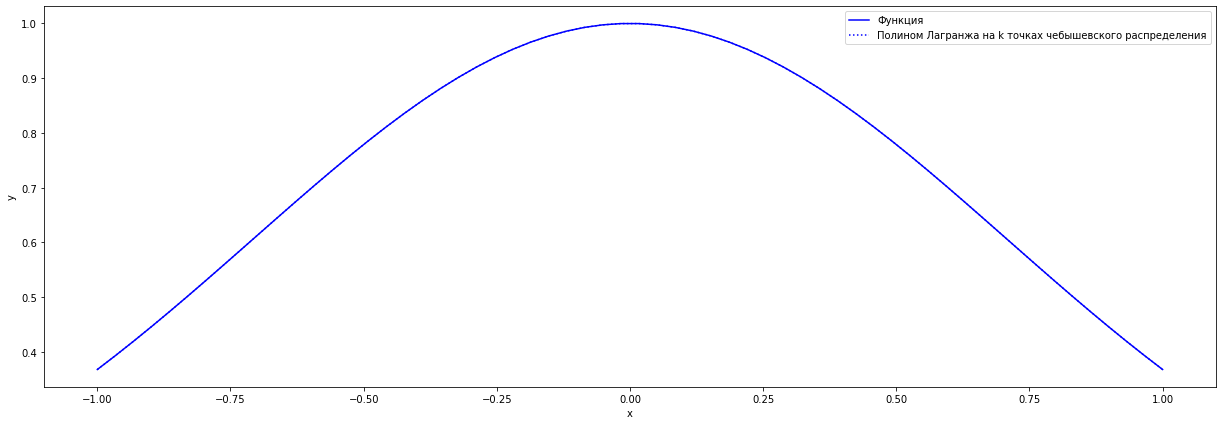

In [ ]:
plt.figure(figsize = (21, 7))
plt.plot(X, Y, label = u'Функция', color = 'b')
lagrY = [lagr_poly(x, Xcheb, Ycheb) for x in X]
plt.plot(X, lagrY, label = u'Полином Лагранжа на k точках чебышевского распределения', ls = ':', color = 'blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [ ]:
print ('Ошибка полинома Лагранжа на k точках чебышевского распределения:', np.max(np.abs(Y - lagrY)))

Ошибка полинома Лагранжа на k точках чебышевского распределения: 1.2212453270876722e-15


Когда количество точек 2k, то равномерное распределение дает точность лучше, чем аналогичное при 3k точках. Чебышевское дает точность выше, чем равномерное, оно почти одинаковое в обоих случаях.
